In [3]:
# load necessary libraries
library(DBI)
library(corrgram)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:corrgram’:

    panel.fill

Loading required package: ggplot2
Loading required package: magrittr
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

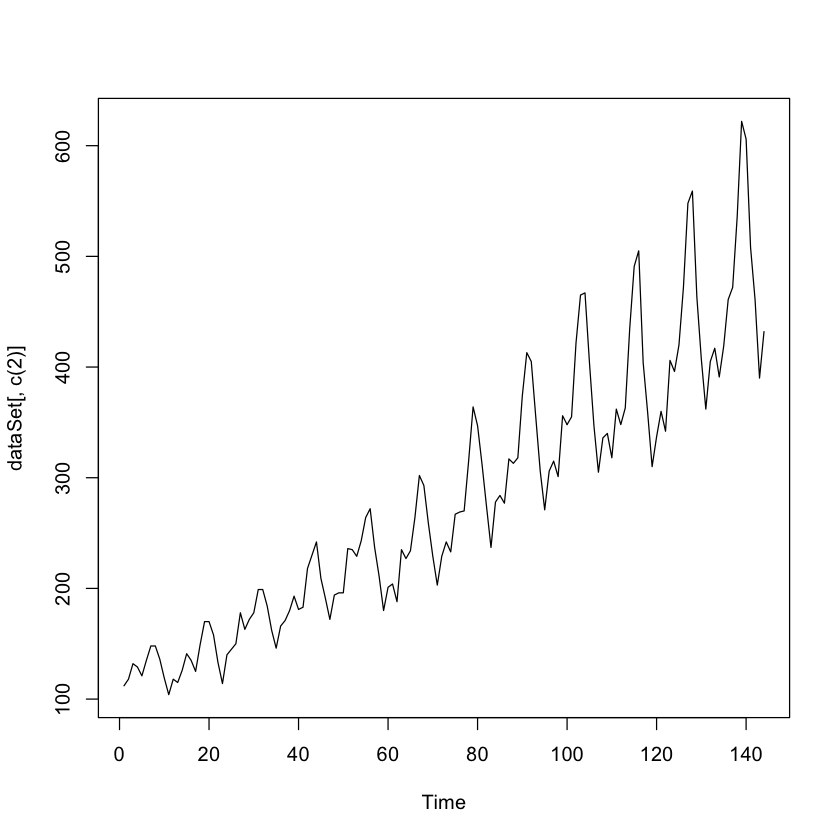

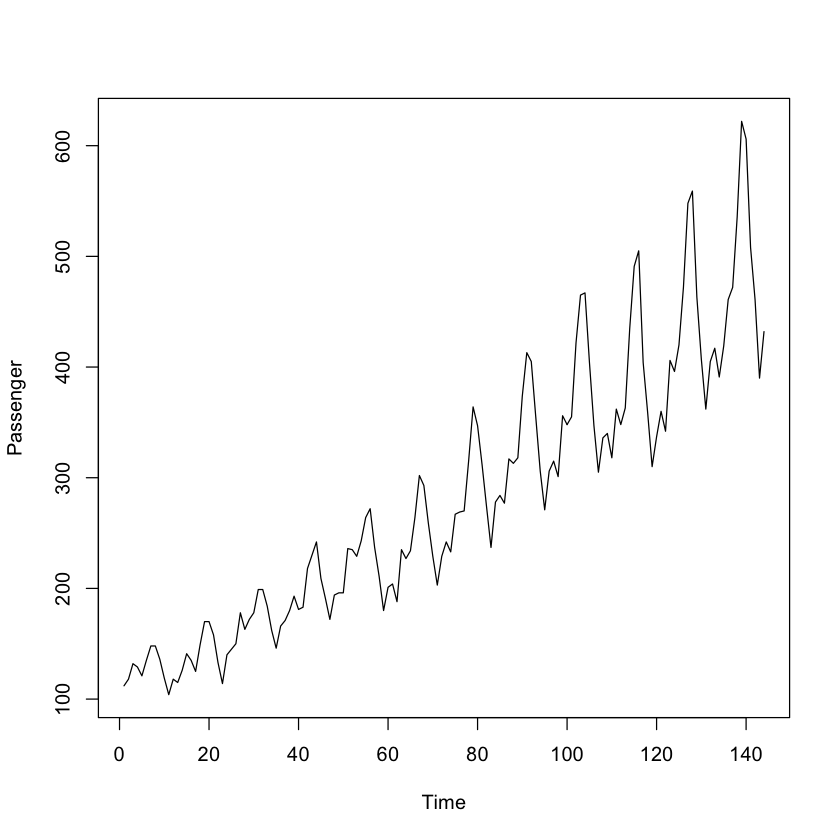

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

# Create "x" variable as row numbers / names
names(dataSet) <- 1:length(dataSet)

df <- cbind(read.table(text = names(dataSet)), dataSet)
x = df$V1; y = df$dataSet

In [7]:
# Define the Polynomial model: y ~ poly(x,4, raw = TRUE)
Model  = lm(y  ~ poly(x,4, raw = TRUE))

# Summarise the fitted model 
summary(Model)


Call:
lm(formula = y ~ poly(x, 4, raw = TRUE))

Residuals:
   Min     1Q Median     3Q    Max 
-97.78 -27.80  -6.56  20.12 148.11 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.187e+02  1.964e+01   6.043 1.32e-08 ***
poly(x, 4, raw = TRUE)1  1.037e+00  1.863e+00   0.556    0.579    
poly(x, 4, raw = TRUE)2  2.054e-02  5.200e-02   0.395    0.693    
poly(x, 4, raw = TRUE)3 -1.056e-04  5.379e-04  -0.196    0.845    
poly(x, 4, raw = TRUE)4  2.626e-07  1.841e-06   0.143    0.887    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.19 on 139 degrees of freedom
Multiple R-squared:  0.8621,	Adjusted R-squared:  0.8581 
F-statistic: 217.2 on 4 and 139 DF,  p-value: < 2.2e-16


In [9]:
# Summarise the r_squared for actual and fitted data 
summary(Model)$r.squared; r2 <- cor(fitted(Model), y)^2; print(r2)

[1] 0.8620593

[1] 0.8620593


In [14]:
# Generate the trendline and fitted values
tendency = coef(Model)[[5]] * x^4 + coef(Model)[[4]] * x^3 + coef(Model)[[3]] * x^2 + coef(Model)[[2]] * x + coef(Model)[[1]]
print(tendency)

  [1] 119.7543 120.8517 121.9889 123.1653 124.3803 125.6333 126.9236 128.2508
  [9] 129.6142 131.0132 132.4472 133.9158 135.4182 136.9541 138.5227 140.1237
 [17] 141.7563 143.4202 145.1148 146.8395 148.5939 150.3775 152.1897 154.0301
 [25] 155.8981 157.7934 159.7154 161.6636 163.6377 165.6371 167.6613 169.7101
 [33] 171.7828 173.8792 175.9987 178.1410 180.3056 182.4921 184.7002 186.9295
 [41] 189.1795 191.4499 193.7403 196.0503 198.3796 200.7279 203.0948 205.4799
 [49] 207.8829 210.3035 212.7413 215.1961 217.6676 220.1554 222.6592 225.1787
 [57] 227.7137 230.2639 232.8291 235.4088 238.0030 240.6113 243.2334 245.8693
 [65] 248.5185 251.1809 253.8563 256.5445 259.2452 261.9582 264.6834 267.4205
 [73] 270.1695 272.9300 275.7019 278.4851 281.2794 284.0847 286.9007 289.7274
 [81] 292.5647 295.4124 298.2703 301.1384 304.0166 306.9048 309.8028 312.7106
 [89] 315.6281 318.5553 321.4919 324.4381 327.3937 330.3587 333.3330 336.3166
 [97] 339.3095 342.3116 345.3229 348.3434 351.3732 354.4121 357.

In [16]:
# Generate the forecast in the future time horizon
steps = 25
x_in_Future <- (length(x)+1) : (length(x)+steps)

forecastedValues = coef(Model)[[5]] * x_in_Future^4 + coef(Model)[[4]] * x_in_Future^3 + coef(Model)[[3]] * x_in_Future^2 + coef(Model)[[2]] * x_in_Future + coef(Model)[[1]]  
print(forecastedValues)

 [1] 494.8095 498.3483 501.9029 505.4734 509.0602 512.6635 516.2838 519.9213
 [9] 523.5763 527.2491 530.9401 534.6497 538.3782 542.1258 545.8931 549.6803
[17] 553.4878 557.3160 561.1653 565.0361 568.9287 572.8437 576.7813 580.7420
[25] 584.7262


In [17]:
# Plotting Observed versus Predicted
res <- stack(data.frame(Observed = c(y,forecastedValues), 
                        Predicted = c(tendency, forecastedValues)))
res <- cbind(res, x = rep(c(x,x_in_Future) , 2))

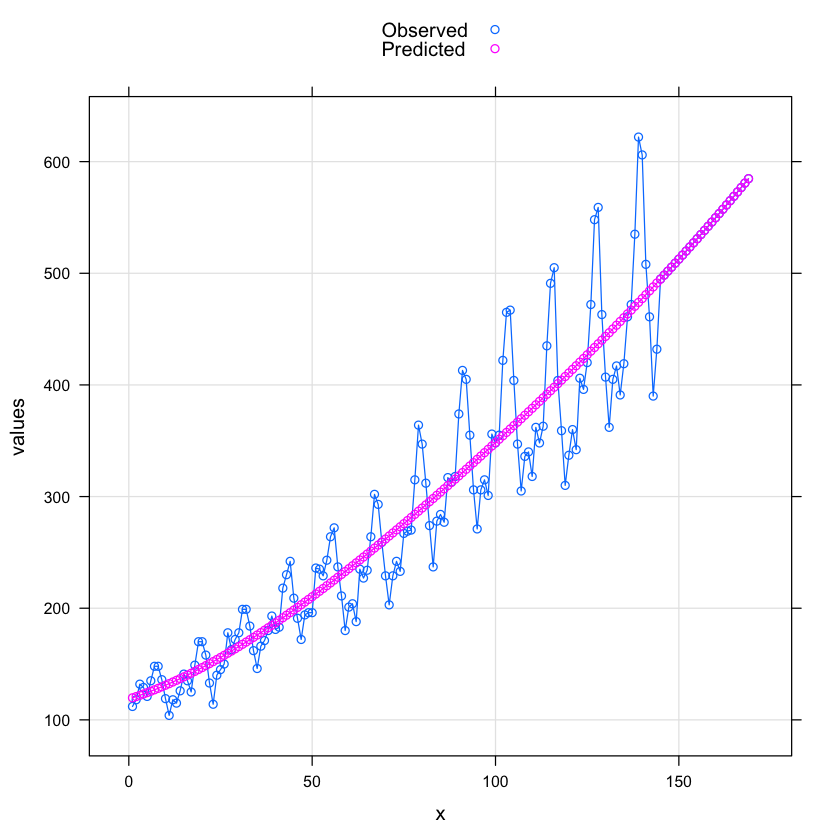

In [18]:
require("lattice")
g1 <- xyplot(values ~ x, data = res, group = ind, auto.key = TRUE, grid = TRUE,
             type=c("p","l"))

library(gridExtra)
grid.arrange(g1, nrow = 1)